# Matrix Multiplication from Foundations
The foundations are:
- Python
- matplotlib
- Python standard library
- Jupyter notebooks and nbdev

In [2]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

## Get Data

In [3]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path("data")
path_data.mkdir(exist_ok=True)
path_gz = path_data/"mnist.pkl.gz"

Tips
* Press shift + tab to see what options a method has
* Or you can just hit tab inside of the method call
* shift enter on a function without arguments to see where it comes from
* put a questionmark after it to read the docs
* put two questionmakrs after it to read the source code

In [4]:
from urllib.request import urlretrieve

In [5]:
urlretrieve

<function urllib.request.urlretrieve(url, filename=None, reporthook=None, data=None)>

In [7]:
urlretrieve?

Signature: urlretrieve(url, filename=None, reporthook=None, data=None)
Docstring:
Retrieve a URL into a temporary location on disk.

Requires a URL argument. If a filename is passed, it is used as
the temporary file location. The reporthook argument should be
a callable that accepts a block number, a read size, and the
total file size of the URL target. The data argument should be
valid URL encoded data.

If a filename is passed and the URL points to a local resource,
the result is a copy from local file to new file.

Returns a tuple containing the path to the newly created
data file as well as the resulting HTTPMessage object.
File:      /usr/lib/python3.11/urllib/request.py
Type:      function

In [8]:
urlretrieve??

Signature: urlretrieve(url, filename=None, reporthook=None, data=None)
Source:   
def urlretrieve(url, filename=None, reporthook=None, data=None):
    """
    Retrieve a URL into a temporary location on disk.

    Requires a URL argument. If a filename is passed, it is used as
    the temporary file location. The reporthook argument should be
    a callable that accepts a block number, a read size, and the
    total file size of the URL target. The data argument should be
    valid URL encoded data.

    If a filename is passed and the URL points to a local resource,
    the result is a copy from local file to new file.

    Returns a tuple containing the path to the newly created
    data file as well as the resulting HTTPMessage object.
    """
    url_type, path = _splittype(url)

    with contextlib.closing(urlopen(url, data)) as fp:
        headers = fp.info()

        # Just return the local path and the "headers" for file://
        # URLs. No sense in performing a copy unless r

In [9]:
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [10]:
!ls -1 data

mnist.pkl.gz


In [11]:
with gzip.open(path_gz, "rb") as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

I don't understand how you would know to destructure it like this though

- "rb" specifies that we want to read as binary
- The tuples on the left of the expression are destructuring the data

- We convert to a list since the data will be returned as numpy

In [12]:
lst1 = list(x_train[0])
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

- This is a function for breaking up a list into chunks
- We step through the list at the given chunk size
- Yield allows us to return from this list withou breaking the loop so we can return each chunk of the list in an iterable
- Iterables are things you can call next() on

In [13]:
def chunks(x, size):
    for i in range(0, len(x), size): yield x[i:i+size]

In [14]:
list(chunks(vals, 5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

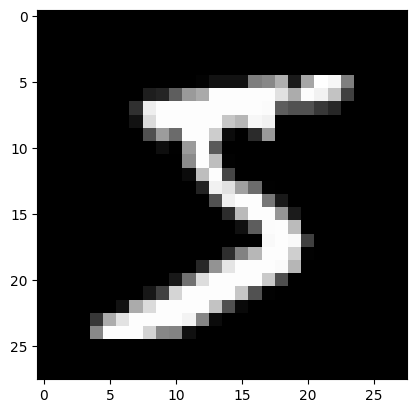

In [15]:
mpl.rcParams["image.cmap"] = "gray"
plt.imshow(list(chunks(lst1, 28)));

## Iterators
- Iterators are really important and they can often replace more complilcated pieces of software
- They can process chunks of data sequentially without storing it all in memory

In [16]:
from itertools import islice

In [17]:
it = iter(vals)
islice(it, 5)

- Can turn any list into an interator
- islice converts it into a different kind of iterator
- islice grabs the first n things from an iterable
- This is interesting becuase we can make our own version of yield

In [18]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))

- iter can take a list or a callable
- a callable is generally a function x()
- the callable function will be called until the function returns the value we pass to it ( [] )
- [] will be returned when the islice is done

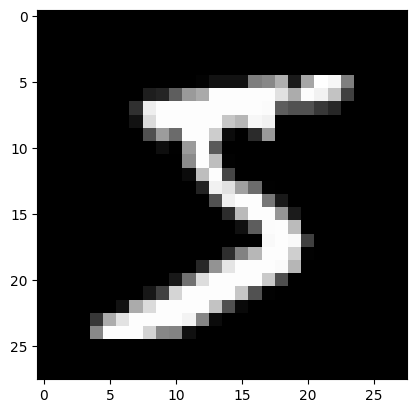

In [19]:
plt.imshow(img);

## Matrix and Tensor
- To access the values in our img list, we would have to index into them but we don't really want to do this
- Instead we will create our own matrix class so we can treat the list like a matrix

In [20]:
class Matrix:
    def __init__(self, xs):
        self.xs = xs
    def __getitem__(self, idxs):
        return self.xs[idxs[0]][idxs[1]]

- __ __ are dunder methods are the standard python object methods
- We need to define the behavior in these cases
- When we initialize the Matrix, we pass in our values which is stored as an object attribute
- We alose need a way to get things from our matrix. When we call [] on our object, python calls our __getitem__ method

In [21]:
m = Matrix(img)
m[20,15]

0.98828125

In [22]:
import torch
from torch import tensor

In [23]:
tens = tensor(img)
tens[20,15]

tensor(0.9883)

- Thus with our matrix class we have successfully implemented the basics of a tensor and we can now use the tensor object

In [24]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
x_train.shape

torch.Size([50000, 784])

- map returns an interator that applies the function we give it to every item of the iterable and yields the results
- In this case our tuple is the iterable and map will apply tensor to each list and return it which we can then save

In [25]:
imgs = x_train.reshape([-1, 28, 28])
imgs.shape

torch.Size([50000, 28, 28])

- This is the equivalent tensor method to our chunks function from before
- reshape([50000, 28, 28]) is equivalent but we don't need to specify it

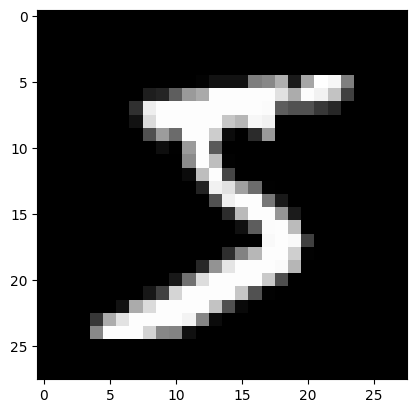

In [26]:
plt.imshow(imgs[0])

#### What is a tensor?
- Goes back to a language called APL
- Mathematical notation for defining IBM systems
- The creator of APL studied tensor analysis from physics
- He implemented the functionality of physics tensors in code
- This is good becasue we no longer have to write loops for everything, we can express them directly
- APL calls these things arrays
- Numpy calls them arrays
- PyTorch calls them tensors
- They are all the same thing
- They are rectangular blocks of numbers with any number of dimensions

##### Back to our code
- Our tensor is a rank 3 tensor (3 dimensions)

In [27]:
imgs[0].shape

torch.Size([28, 28])

In [28]:
imgs[0,20,15]

tensor(0.9883)

In [29]:
x_train.shape

torch.Size([50000, 784])

In [30]:
n,c = x_train.shape
y_train, y_train.shape

(tensor([5, 0, 4,  ..., 8, 4, 8]), torch.Size([50000]))

In [31]:
min(y_train), max(y_train)

(tensor(0), tensor(9))

## Random Numbers
- We don't actually need to build a random number generator since there is on included in the standard Python library but we will anyways because it is good to know
- Computers cannot actually generate random numbers
- There is a cool website where you can use and API to get random numbers generated by quantum fluctuations in a vacuum
- CloudFlare uses a wall of lava lamps and a camera to generate random numbers
- All these things can get you random numbers but they are kind of slow

#### Sudo Random
- Instead we use a sudo random number generator
- Our sudo random number generator looks like it is returning randomly distributed numbers
- For this we want our generator to return numbers that don't appear to be correlated and are evenly distributed over the range provided

In [32]:
rnd_state = None
def seed(a):
    global rnd_state
    a, x = divmod(a, 30268)
    a, y = divmod(a, 30306)
    a, z = divmod(a, 30322)
    rnd_state = int(x)+1, int(y)+1, int(z)+1

In [33]:
seed(21029384710239840)
rnd_state

(24701, 14214, 1826)

In [35]:
def rand():
    global rnd_state
    x, y, z = rnd_state
    x = (171 * x) % 30296
    y = (172 * y) % 30307
    z = (170 * z) % 30323
    rnd_state = x,y,z
    return (x/30296 + y/30307 + z/30323) % 1.0

In [36]:
rand(), rand(), rand()

(0.3252986819280379, 0.05705734701170684, 0.3600646416501161)

In [37]:
if os.fork(): print(f"In parent: {rand()}")
else:
    print(f"In child: {rand()}")
    os._exit(os.EX_OK)

In parent: 0.9501540726215909
In child: 0.9501540726215909


In [38]:
if os.fork(): print(f"In parent: {torch.rand(1)}")
else:
    print(f"In child: {torch.rand(1)}")
    os._exit(os.EX_OK)

In parent: tensor([0.2175])
In child: tensor([0.2175])


In [39]:
from random import random

In [40]:
if os.fork(): print(f"In parent: {random()}")
else:
    print(f"In child: {random()}")
    os._exit(os.EX_OK)

In parent: 0.8364384618330856
In child: 0.44589507385756755


- Need to remember that random number generators rely on the this global rnd_state
- if we use os.fork() it will create a whole seperate copy of this python process
- If we try and create random numbers in these processes, we will get the same number since the processes are copies of one another
- This comes up in deep learning becasue we often do parallel processing
- To get truly random numbers in parallel processing, you need to initialize the random generator in each process
- PyTorch, and NumPy fail to do this but the Python standard library works

In [41]:
%timeit -n 10 list(chunks([rand() for _ in range(7840)], 10))

2.82 ms ± 137 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [42]:
%timeit -n 10 torch.randn(784, 10)

51.1 µs ± 24.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


- These both do the same thing but the PyTorch version is orders of magnitude quicker so we will use the PyTorch version and not ours for training models